# Handwritten Digits Classification using CNN

In [44]:
import tensorflow as tf
from keras.models import Sequential #building of architecture of Neural Network
from keras.layers import Conv2D,Flatten,Dense #formation of layers for our network.
from keras.datasets import mnist #contain all handwritten images
from keras.utils import to_categorical #helps us in doing some encoding in dataset.
import numpy as np
import matplotlib.pyplot as plt



In [45]:
#Loading the data and spliting.


In [46]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [47]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [48]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

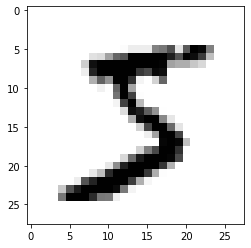

In [49]:
#x_train=tf.keras.utils.normalize(x_train,axis=1) all the values will scale from 0 to 1
#x_test=tf.keras.utils.normalize(x_test,axis=1)

plt.imshow(x_train[0],cmap=plt.cm.binary)

In [50]:
#reshaping the data so that it fits the model

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)



In [51]:
y_train[0]

5

In [52]:
#encoding of the labeled data into a set of 10 numbers to input in NN  
y_train_encode=to_categorical(y_train)
y_test_encode=to_categorical(y_test)


In [53]:
print(y_train_encode[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [54]:
#Building of CNN model ---- 

In [55]:


model=Sequential() #Creation Of Architecture.
# addition of Model Layers

model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1))) #have 64 channels, input_shape is given because it is 1st layer.
model.add(Conv2D(32,kernel_size=3,activation='relu'))

model.add(Flatten()) #it takes the image and flatten them into 1D vector so that it could be connected to NN
model.add(Dense(128,activation='relu')) #input

model.add(Dense(10,activation='softmax')) #ouput


In [56]:
model.summary()


#Compilation of model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 2,379,818
Trainable params: 2,379,818
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) #loss is used because we have more than 2 channels i.e 10,

In [58]:
#Training the Model
training=model.fit(x_train,y_train_encode,validation_data=(x_test,y_test_encode),epochs=3) #epochs are the no. of times iterations has been done of dataset back and forth into the neural  network.

Epoch 1/3
1875/1875 [==============================] - 151s 80ms/step - loss: 0.2757 - accuracy: 0.9523 - val_loss: 0.1009 - val_accuracy: 0.9690
Epoch 2/3
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.1043 - val_accuracy: 0.9685
Epoch 3/3
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0817 - val_accuracy: 0.9796


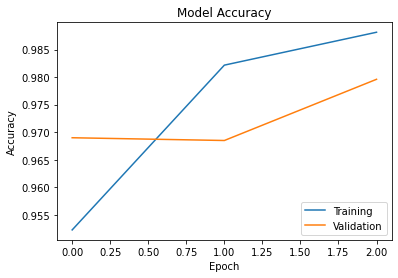

In [61]:
#Visualize the model Accuracy 

plt.plot(training.history['accuracy']) #Accuracy on training data

plt.plot(training.history['val_accuracy']) #Accuracy on test data

plt.title('Model Accuracy') #Graph Name

plt.ylabel('Accuracy') #Y-axis

plt.xlabel('Epoch') #X-axis

plt.legend(['Training', 'Validation'], loc='lower right') 


In [64]:
val_loss,val_acc=model.evaluate(x_test,y_test_encode)
print(val_loss,val_acc)

313/313 [==============================] - 5s 17ms/step - loss: 0.0817 - accuracy: 0.9796
0.08169719576835632 0.9796000123023987


In [66]:
#show predictions as Probability for first 6 images in the test set
predictions=model.predict(x_test[0:6])
predictions



array([[3.08041259e-10, 1.64000313e-10, 6.68268330e-10, 1.71818088e-10,
        1.72707578e-13, 2.27469536e-11, 9.69181959e-15, 1.00000000e+00,
        6.85795257e-12, 7.56749108e-10],
       [1.27227840e-12, 7.61328181e-07, 9.99999285e-01, 1.53934157e-13,
        6.48841495e-13, 2.69617743e-13, 9.46110269e-13, 6.35406788e-12,
        3.70135693e-12, 6.60487012e-11],
       [2.74583384e-10, 1.00000000e+00, 1.16883436e-09, 2.86421088e-13,
        1.24214236e-10, 9.23605303e-10, 2.19323917e-11, 3.46115758e-09,
        2.17217896e-10, 4.74651642e-08],
       [9.99994874e-01, 2.10993733e-07, 1.82642793e-06, 1.28469715e-08,
        5.71655345e-09, 1.47621790e-07, 4.84025804e-07, 1.18782715e-07,
        5.49596493e-08, 2.40167583e-06],
       [3.49234031e-10, 9.96880425e-11, 3.35005721e-12, 3.06712954e-11,
        9.99999166e-01, 5.37682565e-10, 9.27448882e-11, 3.90471726e-08,
        4.38299601e-08, 8.63892353e-07],
       [3.60172066e-11, 9.99999404e-01, 9.24192101e-09, 7.70624287e-13,
   

In [67]:
#print our predictions as number lables 
print(np.argmax(predictions,axis=1))


[7 2 1 0 4 1]


In [68]:
print(y_test[:6])

[7 2 1 0 4 1]


In [69]:
#Since both are same this shows our models has done the training pefectly. 

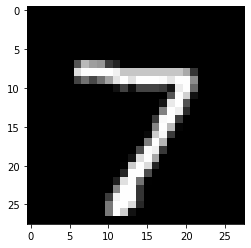

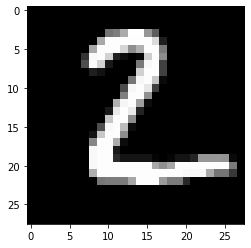

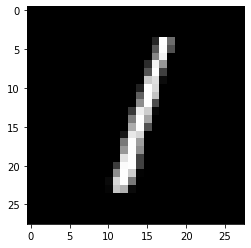

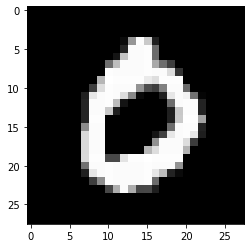

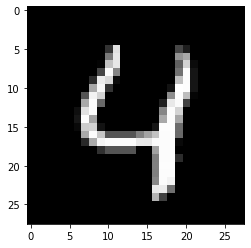

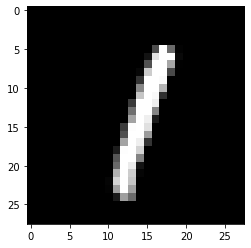

In [70]:
#Showing first 6 images as picture

for i in range(0,6):
    image=x_test[i]
    image=np.array(image,dtype='float')
    pixels=image.reshape((28,28))
    plt.imshow(pixels,cmap='gray')
    plt.show()
    